# Deep Learning with Cyrillic Data 
Chase Yakaboski, 10/23/2018

## 1. Data Preparation
    - Image loading function
    - Load in of images 
    - Plot histogram of Labels
    
## 2. Deep Fully Connected Neural Network
    - Preprocess Data
    - Split Data into Training and Testing
    - Define Model
    - Compile Model
    - Run Model
    - Analysis

## 3. Deep Convolutional Neural Network
    - Preprocess Data
    - Split Data into Training and Testing
    - Define Model
    - Compile Model
    - Run Model
    - Analysis

In [1]:
import numpy as np
import pandas
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.11.0


## 1. Data Preparation

In [2]:
#-- Function to Load in Data
#-- This Function expects images to be in seperated folders in which each folder is a different character. 

def load_images(path_to_images='/Users/Chase/Documents/Dartmouth/courses/engs-108/homework/Cyrillic', image_size=40):
    #-- First we change directory to the path to images.
    os.chdir(path_to_images)
    letter_class = [name for name in os.listdir() if os.path.isdir(name)]
    num_classes = len(letter_class)

    images = []
    images_2d = []
    labels = []
    for i in range(0, num_classes):
        for j, file in enumerate(os.listdir(os.path.join(os.getcwd(), letter_class[i]))):
            try:
                path = os.path.join(os.getcwd(), letter_class[i], file)
                im = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                res = cv2.resize(im, dsize=(image_size, image_size))
                r,g,b,a = cv2.split(res)
                im = np.array(a)
                #- Add a dummy dimension
                im = np.expand_dims(im, axis=2)
                images_2d.append(im)
                im_alpha = np.squeeze(im.reshape(-1, image_size**2),axis=0)
                #- Normalize Pixel Values
                im_alpha2 = im_alpha / 255.0 
                images.append(im_alpha2)
                labels.append(i)
            except:
                print('Bad Files:')
                print(path)
                continue
    images = np.array(images)
    labels = np.array(labels)
    images_2d = np.array(images_2d)
    labels_2d = keras.utils.to_categorical(labels, num_classes = num_classes)
    
    return images, images_2d, labels, labels_2d

In [3]:
images, images_2d, labels, labels_2d = load_images(image_size=28)

Bad Files:
/Users/Chase/Documents/Dartmouth/courses/engs-108/homework/Cyrillic/З/.DS_Store


### Now lets plot the labels to make sure each Cyrillic letter has about the same number of samples. 

(array([444., 463., 462., 551., 459., 474., 458., 447., 427., 415., 465.,
        431., 456., 469., 486., 344., 466., 247., 576., 493., 487., 464.,
        461., 433., 446., 470., 431., 508., 438., 459., 424., 448., 465.,
        513.]),
 array([ 0.        ,  0.97058824,  1.94117647,  2.91176471,  3.88235294,
         4.85294118,  5.82352941,  6.79411765,  7.76470588,  8.73529412,
         9.70588235, 10.67647059, 11.64705882, 12.61764706, 13.58823529,
        14.55882353, 15.52941176, 16.5       , 17.47058824, 18.44117647,
        19.41176471, 20.38235294, 21.35294118, 22.32352941, 23.29411765,
        24.26470588, 25.23529412, 26.20588235, 27.17647059, 28.14705882,
        29.11764706, 30.08823529, 31.05882353, 32.02941176, 33.        ]),
 <a list of 34 Patch objects>)

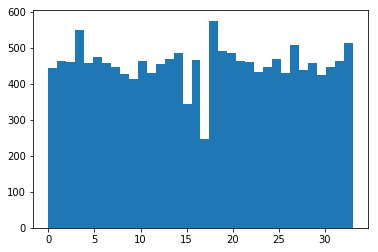

In [4]:
plt.hist(labels, bins=34)

## 2. Deep Fully Connected Network

In [5]:
#-- Preprocess
random_seed = 2
samples_train, samples_test, labels_train, labels_test =  train_test_split(images, labels, 
                                                                           test_size=.3, 
                                                                           random_state=random_seed)

In [6]:
#-- Build Deep Model
model = keras.Sequential()
model.add(keras.layers.Dense(500, input_shape=samples_train[0].shape))
model.add(keras.layers.Dense(400, activation=tf.nn.relu))
model.add(keras.layers.Dense(300, activation=tf.nn.relu))
model.add(keras.layers.Dense(200, activation=tf.nn.relu))
model.add(keras.layers.Dropout(.1))
model.add(keras.layers.Dense(100, activation=tf.nn.relu))
model.add(keras.layers.Dense(80, activation=tf.nn.relu))
model.add(keras.layers.Dense(60, activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(50, activation=tf.nn.relu))
model.add(keras.layers.Dense(45, activation=tf.nn.relu))
model.add(keras.layers.Dense(40, activation=tf.nn.relu))
model.add(keras.layers.Dense(34, activation=tf.nn.softmax))

In [7]:
#-- Compile Model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#-- Train Model
history_full = model.fit(samples_train, labels_train, 
                         batch_size=50, 
                         epochs=30, 
                         validation_data = (samples_test, labels_test))

Train on 10836 samples, validate on 4644 samples
Epoch 1/30
10836/10836 [==============================] - 3s 275us/step - loss: 3.1619 - acc: 0.0929 - val_loss: 2.7780 - val_acc: 0.1654
Epoch 2/30
10836/10836 [==============================] - 2s 206us/step - loss: 2.5285 - acc: 0.2193 - val_loss: 2.2254 - val_acc: 0.3081
Epoch 3/30
10836/10836 [==============================] - 2s 201us/step - loss: 2.0180 - acc: 0.3555 - val_loss: 1.7936 - val_acc: 0.4453
Epoch 4/30
10836/10836 [==============================] - 2s 200us/step - loss: 1.6024 - acc: 0.4839 - val_loss: 1.5811 - val_acc: 0.5069
Epoch 5/30
10836/10836 [==============================] - 2s 212us/step - loss: 1.3153 - acc: 0.5801 - val_loss: 1.3860 - val_acc: 0.5889
Epoch 6/30
10836/10836 [==============================] - 2s 207us/step - loss: 1.0836 - acc: 0.6600 - val_loss: 1.2314 - val_acc: 0.6505
Epoch 7/30
10836/10836 [==============================] - 2s 213us/step - loss: 0.9252 - acc: 0.7158 - val_loss: 1.1222 - v

In [9]:
#-- Evaluate
test_loss, test_acc = model.evaluate(samples_test, labels_test)

4644/4644 [==============================] - 1s 290us/step


In [10]:
print('Accuracy = ', test_acc)

Accuracy =  0.7853143841515935


### Analysis of Accuracy and Loss

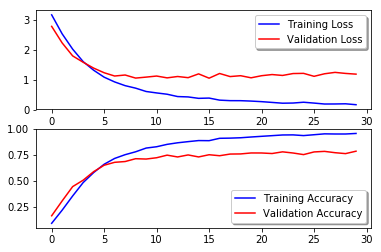

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_full.history['loss'], color='b', label='Training Loss')
ax[0].plot(history_full.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend= ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_full.history['acc'], color='b', label='Training Accuracy')
ax[1].plot(history_full.history['val_acc'], color='r', label='Validation Accuracy')
legend= ax[1].legend(loc='best', shadow=True)

## 3. Deep Convolutional Neural Network

In [42]:
#-- Preprocess
random_seed = 2
samples_train_2d, samples_test_2d, labels_train_2d, labels_test_2d =  train_test_split(images_2d, labels_2d, 
                                                                           test_size=0.1, 
                                                                           random_state=random_seed)

In [43]:
#-- Build CNN Model
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(input_shape= samples_train_2d[0].shape, 
                                  filters=64, 
                                  kernel_size=(5,5), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.Conv2D(filters=64, 
                                  kernel_size=(5,5), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Conv2D(filters=32, 
                                  kernel_size=(3,3), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.Conv2D(filters=32, 
                                  kernel_size=(3,3), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(34, activation='softmax'))

In [54]:
# Python optimisation variables
epochs = 20
batch_size = 50

#-- Set up the Optimizer
optimizer = tf.train.AdamOptimizer()
#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=.9, epsilon=1e-08, decay=0.0)

In [45]:
#-- Compile the Model
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history_cnn = model_cnn.fit(samples_train_2d, labels_train_2d, 
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_data=(samples_test_2d, labels_test_2d))

Train on 13932 samples, validate on 1548 samples
Epoch 1/20
13932/13932 [==============================] - 151s 11ms/step - loss: 0.4176 - acc: 0.8656 - val_loss: 0.3334 - val_acc: 0.9005
Epoch 2/20
13932/13932 [==============================] - 154s 11ms/step - loss: 0.3851 - acc: 0.8756 - val_loss: 0.2834 - val_acc: 0.9147
Epoch 3/20
13932/13932 [==============================] - 158s 11ms/step - loss: 0.3537 - acc: 0.8875 - val_loss: 0.2770 - val_acc: 0.9115
Epoch 4/20
13932/13932 [==============================] - 153s 11ms/step - loss: 0.3247 - acc: 0.8929 - val_loss: 0.2963 - val_acc: 0.9128
Epoch 5/20
13932/13932 [==============================] - 156s 11ms/step - loss: 0.3012 - acc: 0.9021 - val_loss: 0.2804 - val_acc: 0.9186
Epoch 6/20
13932/13932 [==============================] - 152s 11ms/step - loss: 0.2890 - acc: 0.9050 - val_loss: 0.2694 - val_acc: 0.9231
Epoch 7/20
13932/13932 [==============================] - 153s 11ms/step - loss: 0.2835 - acc: 0.9093 - val_loss: 0.2

### Analysis of Accuracy and Loss

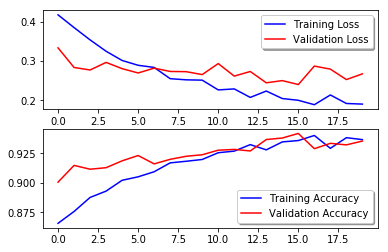

In [56]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_cnn.history['loss'], color='b', label='Training Loss')
ax[0].plot(history_cnn.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend= ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_cnn.history['acc'], color='b', label='Training Accuracy')
ax[1].plot(history_cnn.history['val_acc'], color='r', label='Validation Accuracy')
legend= ax[1].legend(loc='best', shadow=True)

In [57]:
#-- Evaluate
test_loss, test_acc = model_cnn.evaluate(samples_test_2d, labels_test_2d)

1548/1548 [==============================] - 5s 3ms/step


In [58]:
print('Accuracy = ', test_acc)

Accuracy =  0.9354005169498828


Clearly this accuracy is much better than then the fully connected network, even though it was only run for five epochs. Running this for longer would even yield better accuracy, but alas I have no more time. Thanks for reading!